# **Challenge TelecomX LATAM Parte 2**

## **Challenge de la Formación:** Estadísticas y Machine Learning G8 - ONE

## **Daniel Ortiz Aristizábal**

## 🛠️ Preparación de los Datos

### Extracción del Archivo Tratado

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Cargamos los datos
data = pd.read_csv("datos_tratados.csv")
data.head()

,has_churned,gender,is_senior,has_partner,has_dependents,tenure_months,has_phone_service,has_multiple_lines,internet_type,has_online_security,...,has_device_protection,has_tech_support,has_streaming_tv,has_streaming_movies,contract_type,uses_paperless_billing,payment_method,monthly_charges,total_charges,daily_charges_estimate
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   has_churned             7043 non-null   object 
 1   gender                  7043 non-null   object 
 2   is_senior               7043 non-null   int64  
 3   has_partner             7043 non-null   object 
 4   has_dependents          7043 non-null   object 
 5   tenure_months           7043 non-null   int64  
 6   has_phone_service       7043 non-null   object 
 7   has_multiple_lines      7043 non-null   object 
 8   internet_type           7043 non-null   object 
 9   has_online_security     7043 non-null   object 
 10  has_online_backup       7043 non-null   object 
 11  has_device_protection   7043 non-null   object 
 12  has_tech_support        7043 non-null   object 
 13  has_streaming_tv        7043 non-null   object 
 14  has_streaming_movies    7043 non-null   

In [5]:
# Correccion de variables categóricas
data['has_churned']=data['has_churned'].astype('category')
data['gender']=data['gender'].astype('category')
data['has_partner']=data['has_partner'].astype('category')
data['has_dependents']=data['has_dependents'].astype('category')
data['has_phone_service']=data['has_phone_service'].astype('category')
data['has_multiple_lines']=data['has_multiple_lines'].astype('category')
data['internet_type']=data['internet_type'].astype('category')
data['has_online_security']=data['has_online_security'].astype('category')
data['has_online_backup']=data['has_online_backup'].astype('category')
data['has_device_protection']=data['has_device_protection'].astype('category')
data['has_tech_support']=data['has_tech_support'].astype('category')
data['has_streaming_tv']=data['has_streaming_tv'].astype('category')
data['has_streaming_movies']=data['has_streaming_movies'].astype('category')
data['contract_type']=data['contract_type'].astype('category')
data['uses_paperless_billing']=data['uses_paperless_billing'].astype('category')
data['payment_method']=data['payment_method'].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   has_churned             7043 non-null   category
 1   gender                  7043 non-null   category
 2   is_senior               7043 non-null   int64   
 3   has_partner             7043 non-null   category
 4   has_dependents          7043 non-null   category
 5   tenure_months           7043 non-null   int64   
 6   has_phone_service       7043 non-null   category
 7   has_multiple_lines      7043 non-null   category
 8   internet_type           7043 non-null   category
 9   has_online_security     7043 non-null   category
 10  has_online_backup       7043 non-null   category
 11  has_device_protection   7043 non-null   category
 12  has_tech_support        7043 non-null   category
 13  has_streaming_tv        7043 non-null   category
 14  has_streaming_movies    

### Eliminación de Columnas Irrelevantes

In [6]:
data.head()

,has_churned,gender,is_senior,has_partner,has_dependents,tenure_months,has_phone_service,has_multiple_lines,internet_type,has_online_security,...,has_device_protection,has_tech_support,has_streaming_tv,has_streaming_movies,contract_type,uses_paperless_billing,payment_method,monthly_charges,total_charges,daily_charges_estimate
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


In [7]:
# Eliminar variables irrelevantes
data = data.drop('daily_charges_estimate', axis=1)

data.head()

,has_churned,gender,is_senior,has_partner,has_dependents,tenure_months,has_phone_service,has_multiple_lines,internet_type,has_online_security,has_online_backup,has_device_protection,has_tech_support,has_streaming_tv,has_streaming_movies,contract_type,uses_paperless_billing,payment_method,monthly_charges,total_charges
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


### Descripción estadística

In [8]:
data.describe()

,is_senior,tenure_months,monthly_charges,total_charges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


<Axes: >

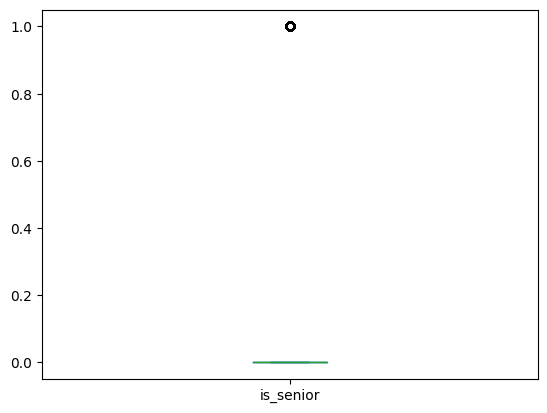

In [9]:
# Descripción variables numéricas
data['is_senior'].plot(kind='box')

<Axes: >

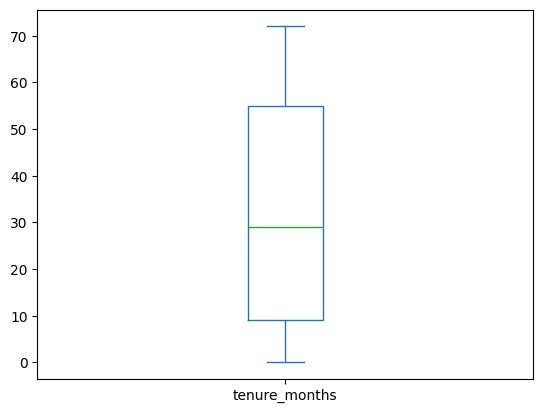

In [10]:
data['tenure_months'].plot(kind='box')

<Axes: >

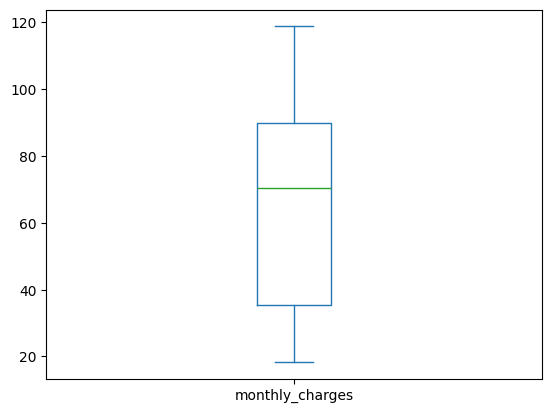

In [11]:
data['monthly_charges'].plot(kind='box')

<Axes: >

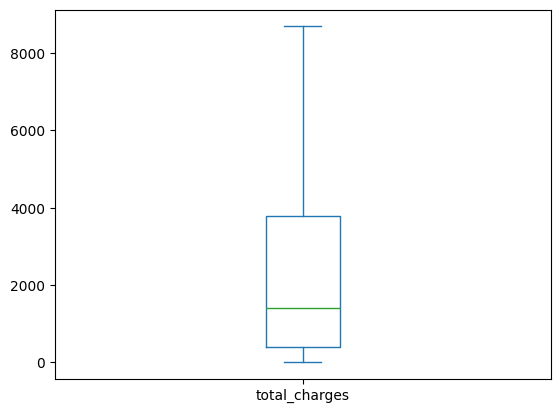

In [12]:
data['total_charges'].plot(kind='box')

<Axes: xlabel='has_churned'>

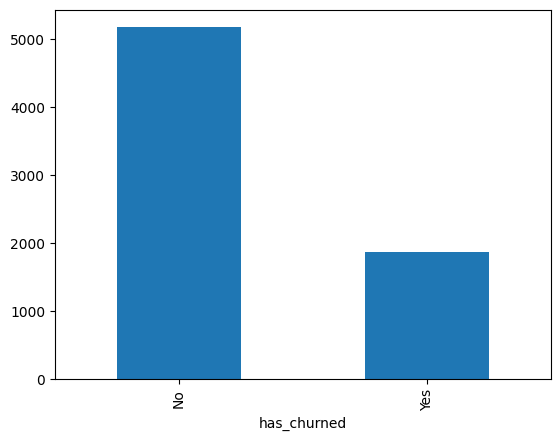

In [13]:
# Descripción variables categóricas
data['has_churned'].value_counts().plot(kind='bar')

<Axes: xlabel='gender'>

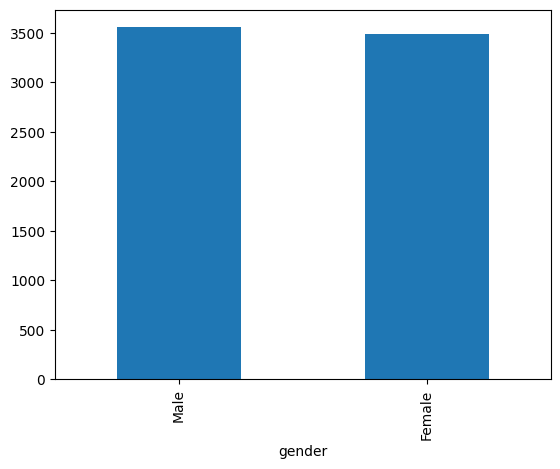

In [14]:
data['gender'].value_counts().plot(kind='bar')

<Axes: xlabel='has_partner'>

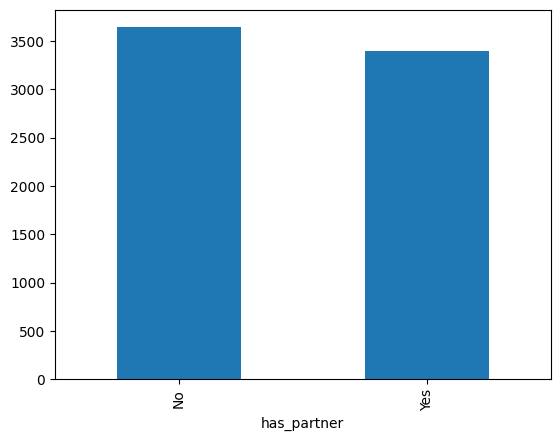

In [15]:
data['has_partner'].value_counts().plot(kind='bar')

<Axes: xlabel='has_dependents'>

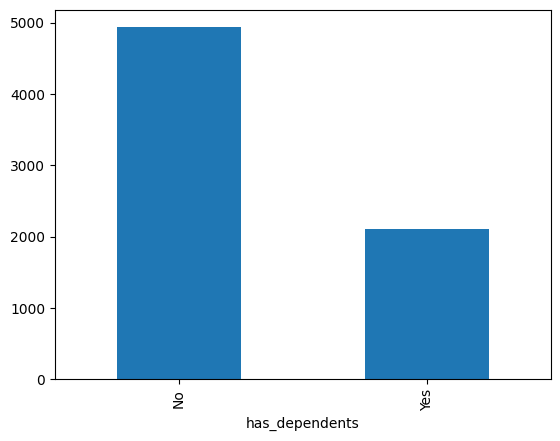

In [16]:
data['has_dependents'].value_counts().plot(kind='bar')

<Axes: xlabel='has_phone_service'>

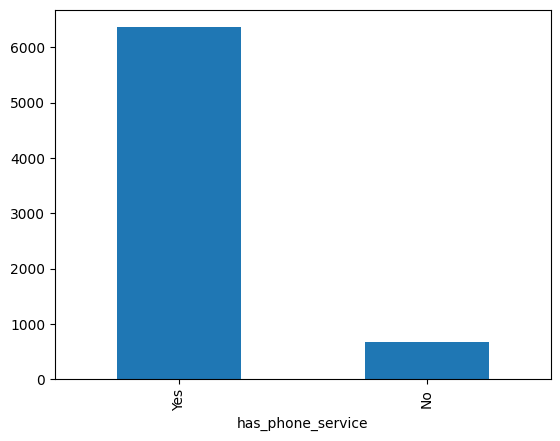

In [17]:
data['has_phone_service'].value_counts().plot(kind='bar')

<Axes: xlabel='has_multiple_lines'>

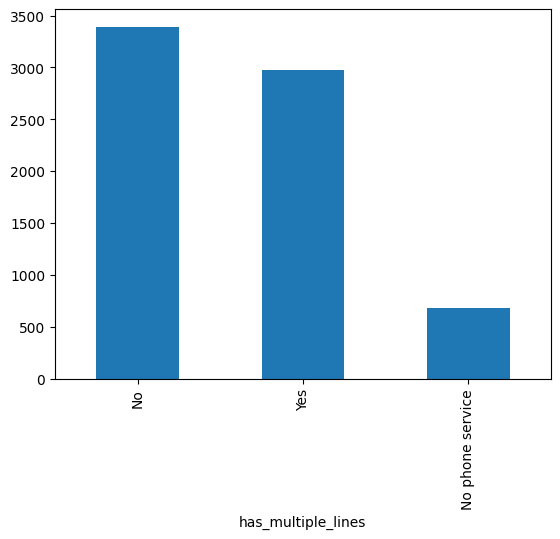

In [18]:
data['has_multiple_lines'].value_counts().plot(kind='bar')

<Axes: xlabel='internet_type'>

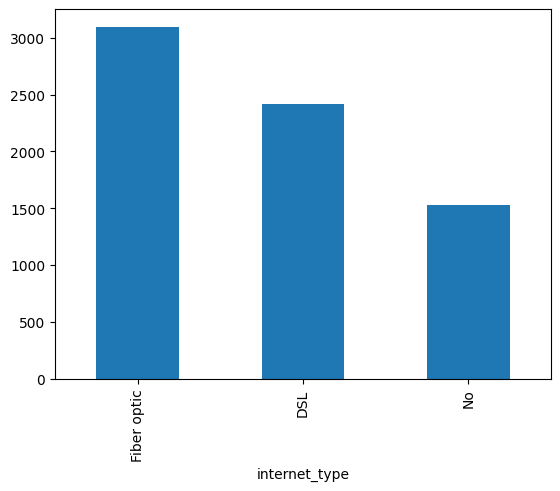

In [19]:
data['internet_type'].value_counts().plot(kind='bar')

<Axes: xlabel='has_online_security'>

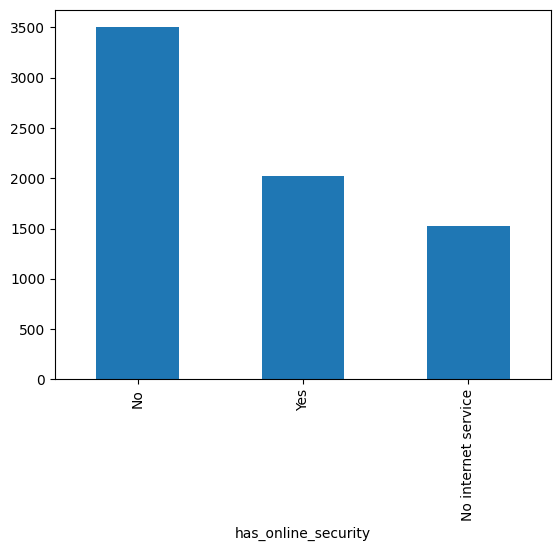

In [20]:
data['has_online_security'].value_counts().plot(kind='bar')

<Axes: xlabel='has_online_backup'>

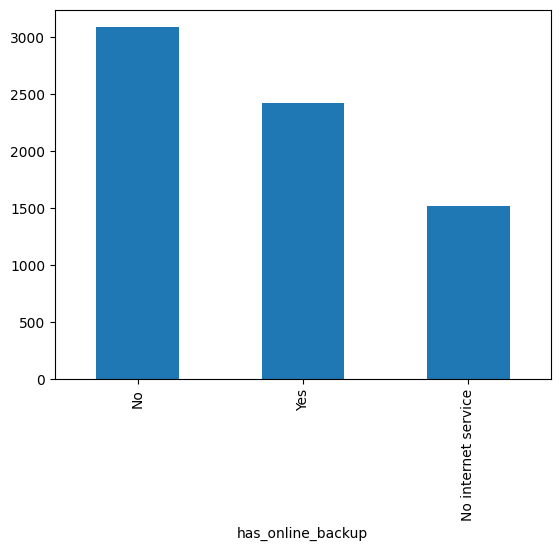

In [21]:
data['has_online_backup'].value_counts().plot(kind='bar')

<Axes: xlabel='has_device_protection'>

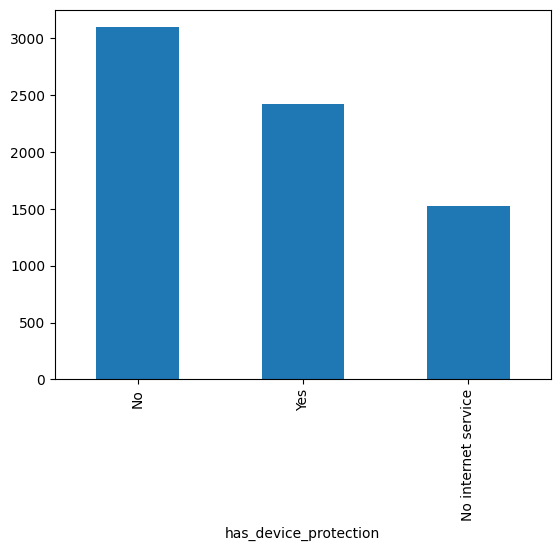

In [22]:
data['has_device_protection'].value_counts().plot(kind='bar')

<Axes: xlabel='has_tech_support'>

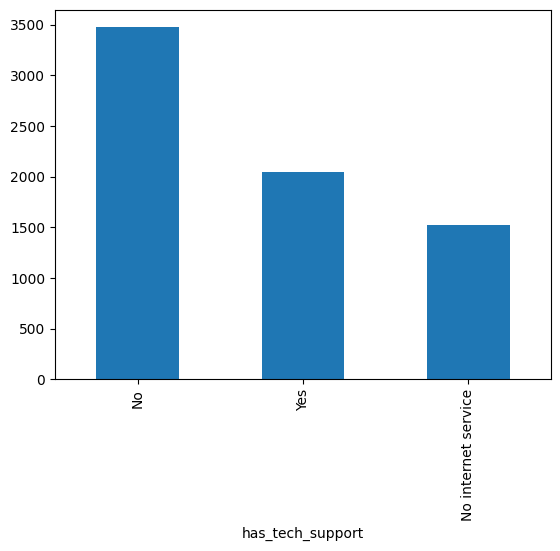

In [23]:
data['has_tech_support'].value_counts().plot(kind='bar')

<Axes: xlabel='has_streaming_tv'>

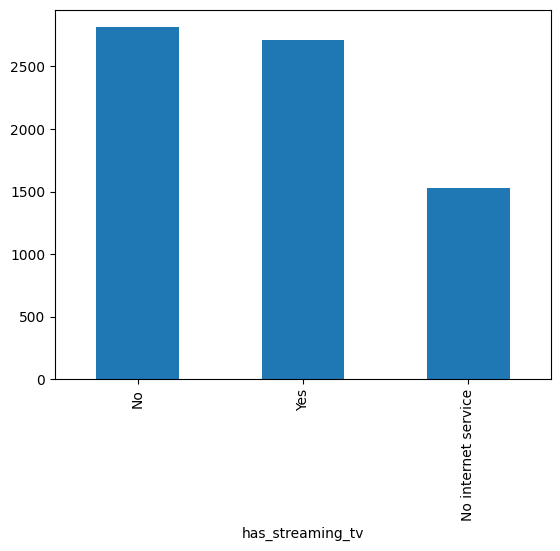

In [24]:
data['has_streaming_tv'].value_counts().plot(kind='bar')

<Axes: xlabel='has_streaming_movies'>

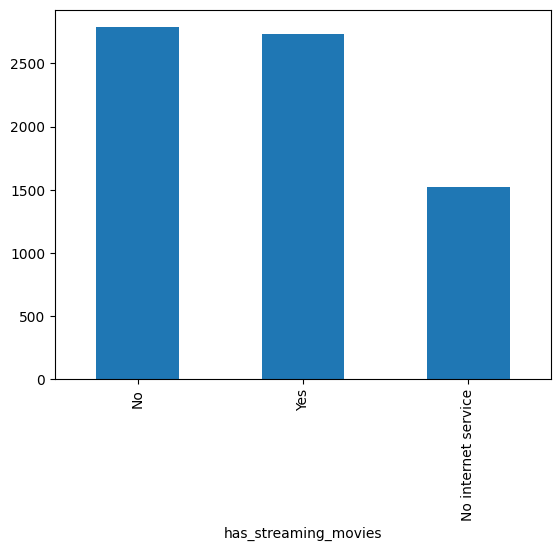

In [25]:
data['has_streaming_movies'].value_counts().plot(kind='bar')

<Axes: xlabel='contract_type'>

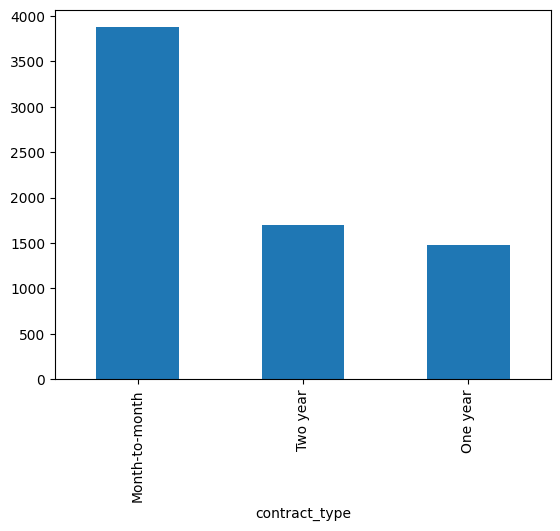

In [26]:
data['contract_type'].value_counts().plot(kind='bar')

<Axes: xlabel='uses_paperless_billing'>

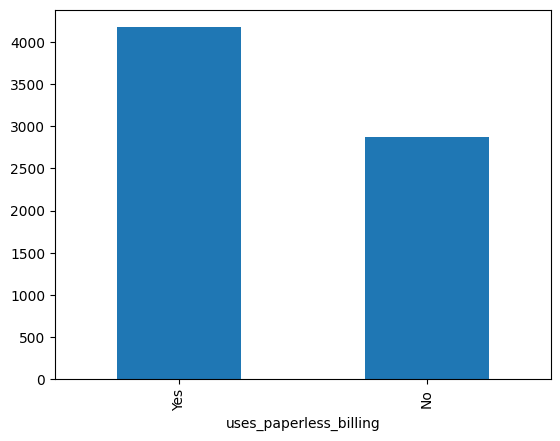

In [27]:
data['uses_paperless_billing'].value_counts().plot(kind='bar')

<Axes: xlabel='payment_method'>

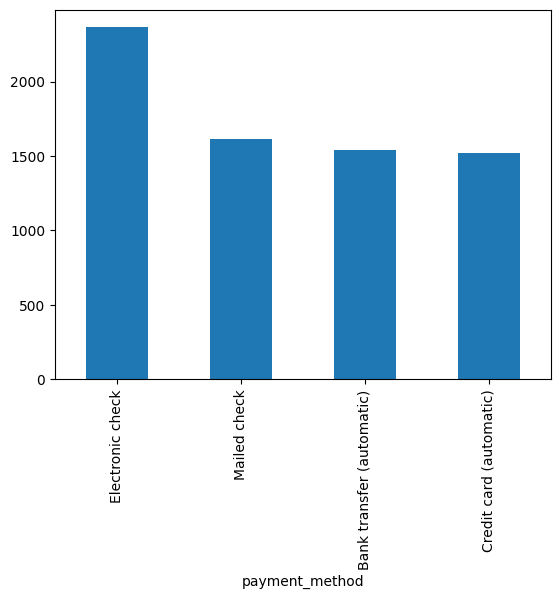

In [28]:
data['payment_method'].value_counts().plot(kind='bar')

### Encoding

In [29]:
# Dummies para las variables categóricas
data = pd.get_dummies(data, columns=['gender','has_partner','has_dependents',
                                     'has_phone_service','uses_paperless_billing'], drop_first=True, dtype=int)
data = pd.get_dummies(data, columns=['has_multiple_lines','internet_type',
                                     'has_online_security','has_online_backup',
                                     'has_device_protection','has_tech_support','has_streaming_tv',
                                     'has_streaming_movies','contract_type',
                                     'payment_method'], drop_first=False, dtype=int)

data.head()

,has_churned,is_senior,tenure_months,monthly_charges,total_charges,gender_Male,has_partner_Yes,has_dependents_Yes,has_phone_service_Yes,uses_paperless_billing_Yes,...,has_streaming_movies_No,has_streaming_movies_No internet service,has_streaming_movies_Yes,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
0,No,0,9,65.6,593.30,0,1,1,1,1,...,1,0,0,0,1,0,0,0,0,1
1,No,0,9,59.9,542.40,1,0,0,1,0,...,0,0,1,1,0,0,0,0,0,1
2,Yes,0,4,73.9,280.85,1,0,0,1,1,...,1,0,0,1,0,0,0,0,1,0
3,Yes,1,13,98.0,1237.85,1,1,0,1,1,...,0,0,1,1,0,0,0,0,1,0
4,Yes,1,3,83.9,267.40,0,1,0,1,1,...,1,0,0,1,0,0,0,0,0,1


### Verificación de la Proporción de Cancelación (Churn)

<Axes: xlabel='has_churned'>

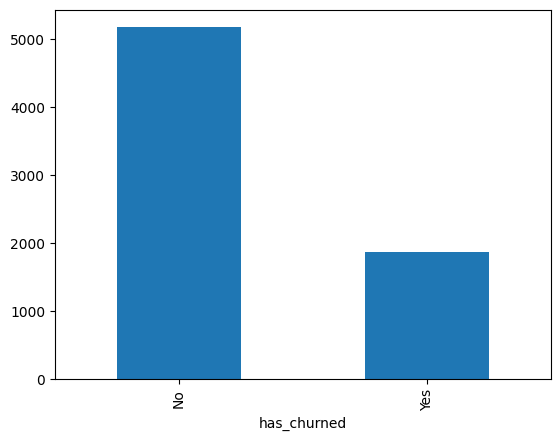

In [30]:
data['has_churned'].value_counts().plot(kind='bar')

## 🎯 Correlación y Selección de Variables

### Análisis de Correlación

In [31]:
# Labelencoder para la variable objetivo
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data["has_churned"]=labelencoder.fit_transform(data["has_churned"])

data.head()

,has_churned,is_senior,tenure_months,monthly_charges,total_charges,gender_Male,has_partner_Yes,has_dependents_Yes,has_phone_service_Yes,uses_paperless_billing_Yes,...,has_streaming_movies_No,has_streaming_movies_No internet service,has_streaming_movies_Yes,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
0,0,0,9,65.6,593.30,0,1,1,1,1,...,1,0,0,0,1,0,0,0,0,1
1,0,0,9,59.9,542.40,1,0,0,1,0,...,0,0,1,1,0,0,0,0,0,1
2,1,0,4,73.9,280.85,1,0,0,1,1,...,1,0,0,1,0,0,0,0,1,0
3,1,1,13,98.0,1237.85,1,1,0,1,1,...,0,0,1,1,0,0,0,0,1,0
4,1,1,3,83.9,267.40,0,1,0,1,1,...,1,0,0,1,0,0,0,0,0,1


In [32]:
import seaborn as sns

# Matriz de correlación
corr_matrix = data.corr()

# Correlación con la variable de cancelación (has_churned)
target_corr = corr_matrix['has_churned'].sort_values(ascending=False)
print(target_corr)

has_churned                                  1.000000
contract_type_Month-to-month                 0.405103
has_online_security_No                       0.342637
has_tech_support_No                          0.337281
internet_type_Fiber optic                    0.308020
payment_method_Electronic check              0.301919
has_online_backup_No                         0.268005
has_device_protection_No                     0.252481
monthly_charges                              0.193356
uses_paperless_billing_Yes                   0.191825
is_senior                                    0.150889
has_streaming_movies_No                      0.130845
has_streaming_tv_No                          0.128916
has_streaming_tv_Yes                         0.063228
has_streaming_movies_Yes                     0.061382
has_multiple_lines_Yes                       0.040102
has_phone_service_Yes                        0.011942
gender_Male                                 -0.008612
has_multiple_lines_No phone 

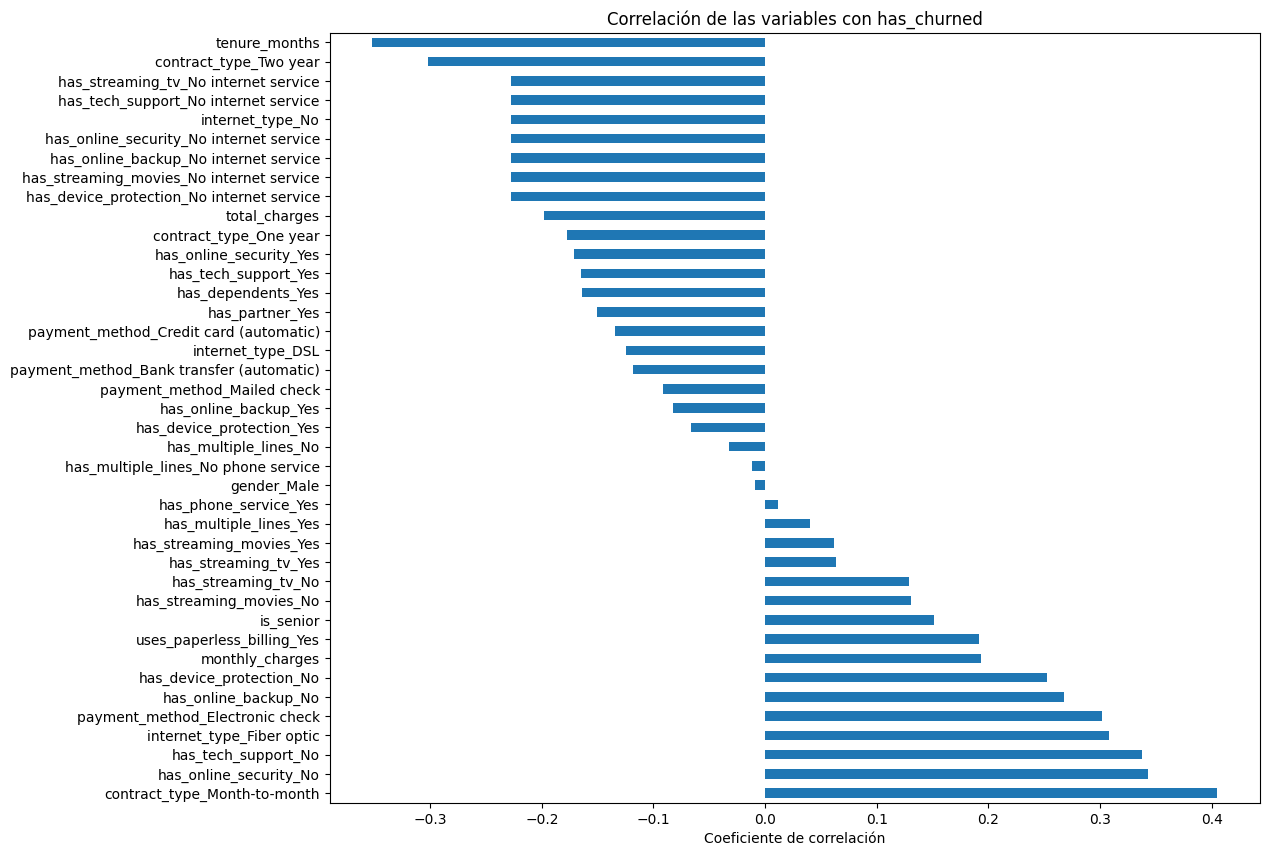

In [33]:
# Correlación con has_churned
plt.figure(figsize=(12, 10))
target_corr.drop('has_churned').plot(kind='barh')
plt.title('Correlación de las variables con has_churned')
plt.xlabel('Coeficiente de correlación')
plt.show()

In [34]:
# Correlaciones mayores a 0.2 o menores a -0.2
strong_corr = target_corr.drop('has_churned')[abs(target_corr.drop('has_churned')) > 0.2]
print(strong_corr)

contract_type_Month-to-month                 0.405103
has_online_security_No                       0.342637
has_tech_support_No                          0.337281
internet_type_Fiber optic                    0.308020
payment_method_Electronic check              0.301919
has_online_backup_No                         0.268005
has_device_protection_No                     0.252481
has_device_protection_No internet service   -0.227890
has_streaming_movies_No internet service    -0.227890
has_online_backup_No internet service       -0.227890
has_online_security_No internet service     -0.227890
internet_type_No                            -0.227890
has_tech_support_No internet service        -0.227890
has_streaming_tv_No internet service        -0.227890
contract_type_Two year                      -0.302253
tenure_months                               -0.352229
Name: has_churned, dtype: float64


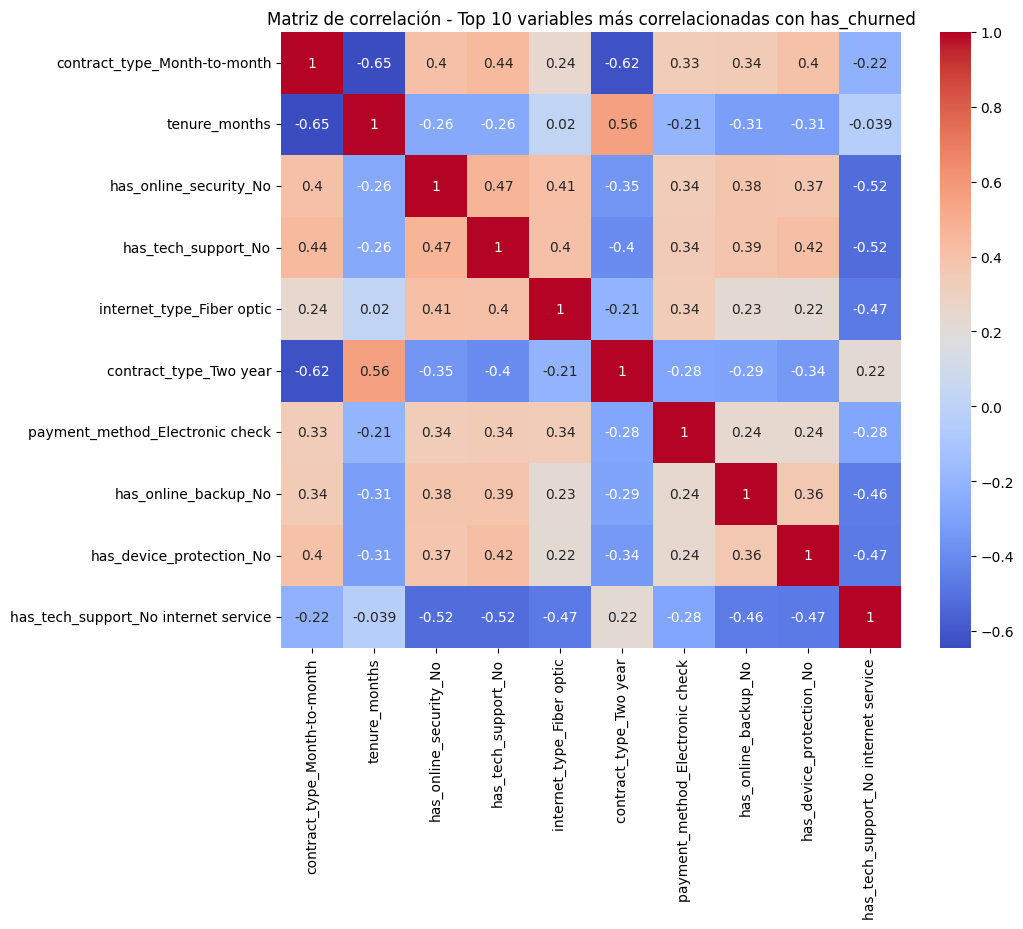

In [35]:
# Top 10 variables más correlacionadas
top_corr_features = target_corr.drop('has_churned').abs().sort_values(ascending=False).head(10).index.tolist()

# Graficar heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data[top_corr_features].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación - Top 10 variables más correlacionadas con has_churned')
plt.show()

### Análisis Dirigido

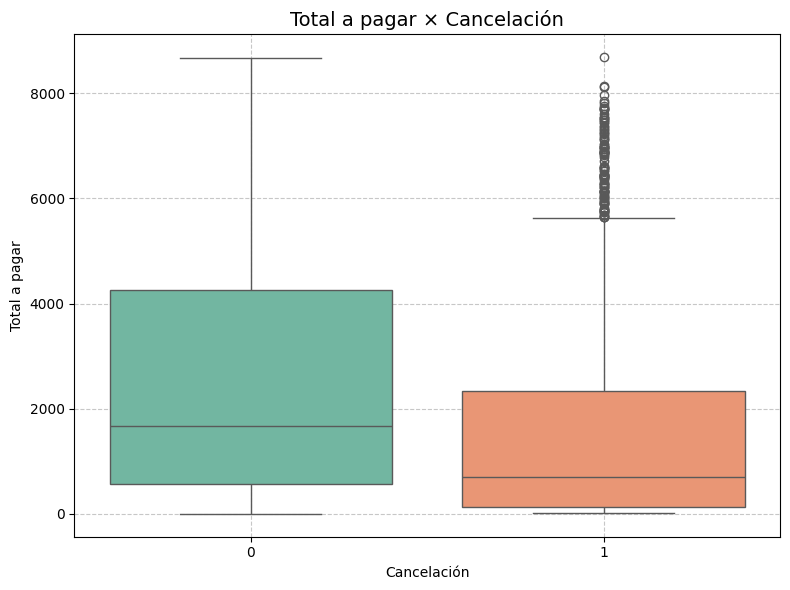

In [36]:
# Tiempo de contrato × Cancelación
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='has_churned', y='total_charges', hue='has_churned', palette='Set2', legend=False)

plt.title('Total a pagar × Cancelación', fontsize=14)
plt.xlabel('Cancelación')
plt.ylabel('Total a pagar')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

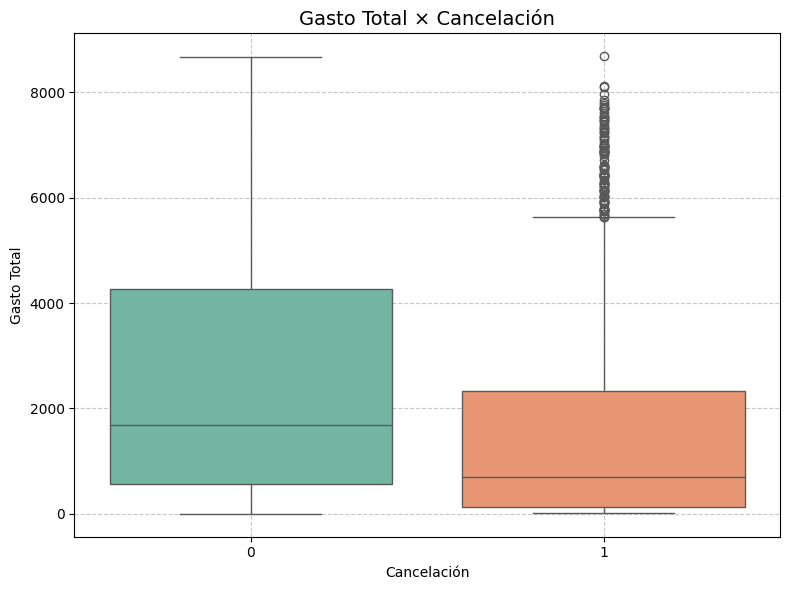

In [37]:
# Gasto total × Cancelación
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='has_churned', y='total_charges', hue='has_churned', palette='Set2', legend=False)

plt.title('Gasto Total × Cancelación', fontsize=14)
plt.xlabel('Cancelación')
plt.ylabel('Gasto Total')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 🤖 Modelado Predictivo

### Separación de Datos

In [38]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

X = data.drop('has_churned', axis=1)
y = data['has_churned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [39]:
from sklearn.preprocessing import MinMaxScaler

# Variables a normalizar
variables_a_normalizar = ['tenure_months','monthly_charges','total_charges']

# Normalizador ajustado solo con X_train
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train[variables_a_normalizar])

X_train[variables_a_normalizar] = min_max_scaler.transform(X_train[variables_a_normalizar])
X_test[variables_a_normalizar] = min_max_scaler.transform(X_test[variables_a_normalizar])

# Aplicar SMOTEENN solo en datos de entrenamiento ya normalizados
smoteenn = SMOTEENN(random_state=42)
X_train_res, y_train_res = smoteenn.fit_resample(X_train, y_train)

<Axes: xlabel='has_churned'>

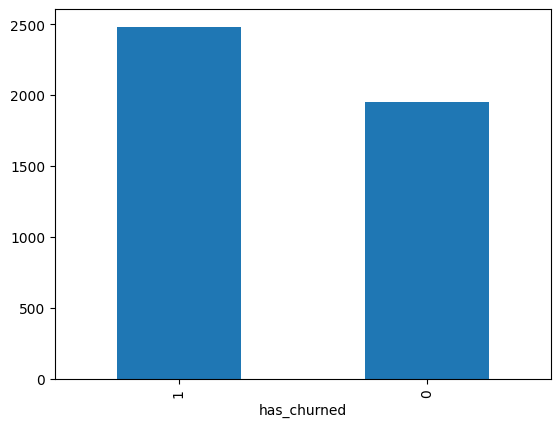

In [40]:
y_train_res.value_counts().plot(kind='bar')

### Creación de Modelos

In [41]:
# Árbol de clasificación
from sklearn import tree

model_tree = tree.DecisionTreeClassifier(min_samples_leaf=2, max_depth=10, random_state=42)
model_tree.fit(X_train_res, y_train_res)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, random_state=42)

In [42]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=2,
                                  max_depth=10, random_state=42)
model_rf.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, random_state=42)

In [43]:
# Random forest optimizado
# Parámetros optimizados luego de buscar con GridSearch
model_rf_opt = RandomForestClassifier(
    bootstrap=False,
    max_depth=None,
    max_features='log2',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)

model_rf_opt.fit(X_train_res, y_train_res)

RandomForestClassifier(bootstrap=False, max_features='log2', random_state=42)

In [44]:
# KNN de clasificación
from sklearn import neighbors

model_knn = neighbors.KNeighborsClassifier(n_neighbors=5, metric='euclidean')
model_knn.fit(X_train_res, y_train_res)

KNeighborsClassifier(metric='euclidean')

In [45]:
# Regresión logística
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_res, y_train_res)

LogisticRegression(random_state=42)

In [46]:
# Regresión logística optimizada
# Parámetros optimizados luego de buscar con GridSearch
model_lr_opt = LogisticRegression(
    C=10,
    class_weight=None,
    penalty='l1',
    solver='liblinear',
    random_state=42
)

model_lr_opt.fit(X_train_res, y_train_res)

LogisticRegression(C=10, penalty='l1', random_state=42, solver='liblinear')

### Evaluación Árbol de clasificación

In [47]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)


<-------------------- Evaluación -------------------->
Exactitud: 0.6990
Precisión: 0.4614
Recall: 0.7986
F1-score: 0.5849
<---------------------------------------------------->

<------------- Reporte de Clasificación ------------->
              precision    recall  f1-score   support

    No Churn       0.90      0.66      0.76      1552
       Churn       0.46      0.80      0.58       561

    accuracy                           0.70      2113
   macro avg       0.68      0.73      0.67      2113
weighted avg       0.78      0.70      0.72      2113
<---------------------------------------------------->



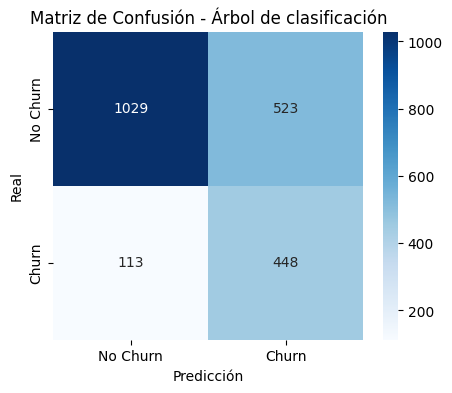

In [48]:
# Evaluación árbol de clasificación
y_pred_tree = model_tree.predict(X_test)

# Exactitud
accuracy_tree = accuracy_score(y_test, y_pred_tree)

# Precisión
precision_tree = precision_score(y_test, y_pred_tree)

# Recall (Sensibilidad)
recall_tree = recall_score(y_test, y_pred_tree)

# F1-score
f1_tree = f1_score(y_test, y_pred_tree)

# Matriz de confusión
cm_tree = confusion_matrix(y_test, y_pred_tree)

# Imprimir resultados
print("\n<-------------------- Evaluación -------------------->")
print(f"Exactitud: {accuracy_tree:.4f}")
print(f"Precisión: {precision_tree:.4f}")
print(f"Recall: {recall_tree:.4f}")
print(f"F1-score: {f1_tree:.4f}")
print("<---------------------------------------------------->")

# Reporte completo
print("\n<------------- Reporte de Clasificación ------------->")
print(classification_report(y_test, y_pred_tree, target_names=["No Churn", "Churn"]), end="")
print("<---------------------------------------------------->")
print()

# Pintar la matriz de confusión
plt.figure(figsize=(5, 4))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Árbol de clasificación')
plt.show()

### Evaluación Random forest


<-------------------- Evaluación -------------------->
Exactitud: 0.7018
Precisión: 0.4675
Recall: 0.8841
F1-score: 0.6116
<---------------------------------------------------->

<------------- Reporte de Clasificación ------------->
              precision    recall  f1-score   support

    No Churn       0.94      0.64      0.76      1552
       Churn       0.47      0.88      0.61       561

    accuracy                           0.70      2113
   macro avg       0.70      0.76      0.68      2113
weighted avg       0.81      0.70      0.72      2113
<---------------------------------------------------->



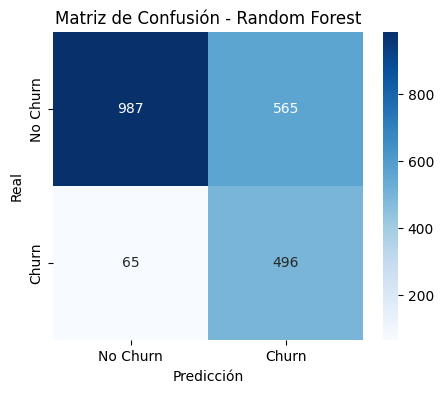

In [49]:
# Evaluación random forest
y_pred_rf = model_rf.predict(X_test)

# Exactitud
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Precisión
precision_rf = precision_score(y_test, y_pred_rf)

# Recall (Sensibilidad)
recall_rf = recall_score(y_test, y_pred_rf)

# F1-score
f1_rf = f1_score(y_test, y_pred_rf)

# Matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Imprimir resultados
print("\n<-------------------- Evaluación -------------------->")
print(f"Exactitud: {accuracy_rf:.4f}")
print(f"Precisión: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")
print("<---------------------------------------------------->")

# Reporte completo
print("\n<------------- Reporte de Clasificación ------------->")
print(classification_report(y_test, y_pred_rf, target_names=["No Churn", "Churn"]), end="")
print("<---------------------------------------------------->")
print()

# Pintar la matriz de confusión
plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Random Forest')
plt.show()

### Evaluación Random forest optimizado


<-------------------- Evaluación -------------------->
Exactitud: 0.7217
Precisión: 0.4860
Recall: 0.8342
F1-score: 0.6142
<---------------------------------------------------->

<------------- Reporte de Clasificación ------------->
              precision    recall  f1-score   support

    No Churn       0.92      0.68      0.78      1552
       Churn       0.49      0.83      0.61       561

    accuracy                           0.72      2113
   macro avg       0.70      0.76      0.70      2113
weighted avg       0.80      0.72      0.74      2113
<---------------------------------------------------->



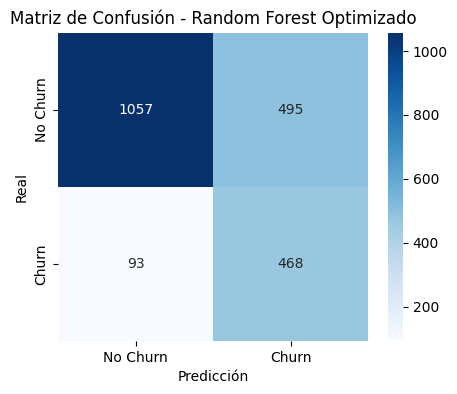

In [50]:
# Evaluación random forest optimizado
y_pred_rf_opt = model_rf_opt.predict(X_test)

# Exactitud
accuracy_rf_opt = accuracy_score(y_test, y_pred_rf_opt)

# Precisión
precision_rf_opt = precision_score(y_test, y_pred_rf_opt)

# Recall (Sensibilidad)
recall_rf_opt = recall_score(y_test, y_pred_rf_opt)

# F1-score
f1_rf_opt = f1_score(y_test, y_pred_rf_opt)

# Matriz de confusión
cm_rf_opt = confusion_matrix(y_test, y_pred_rf_opt)

# Imprimir resultados
print("\n<-------------------- Evaluación -------------------->")
print(f"Exactitud: {accuracy_rf_opt:.4f}")
print(f"Precisión: {precision_rf_opt:.4f}")
print(f"Recall: {recall_rf_opt:.4f}")
print(f"F1-score: {f1_rf_opt:.4f}")
print("<---------------------------------------------------->")

# Reporte completo
print("\n<------------- Reporte de Clasificación ------------->")
print(classification_report(y_test, y_pred_rf_opt, target_names=["No Churn", "Churn"]), end="")
print("<---------------------------------------------------->")
print()

# Pintar la matriz de confusión
plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf_opt, annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Random Forest Optimizado')
plt.show()

### Evaluación KNN de clasificación


<-------------------- Evaluación -------------------->
Exactitud: 0.6711
Precisión: 0.4389
Recall: 0.8574
F1-score: 0.5806
<---------------------------------------------------->

<------------- Reporte de Clasificación ------------->
              precision    recall  f1-score   support

    No Churn       0.92      0.60      0.73      1552
       Churn       0.44      0.86      0.58       561

    accuracy                           0.67      2113
   macro avg       0.68      0.73      0.66      2113
weighted avg       0.79      0.67      0.69      2113
<---------------------------------------------------->



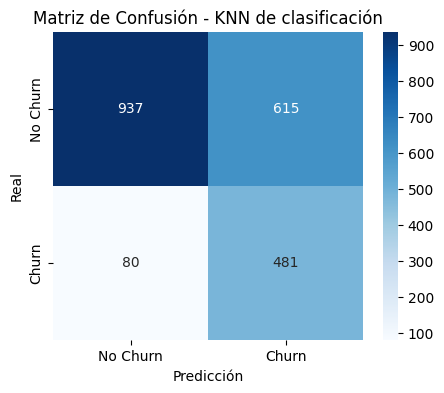

In [51]:
# Evaluación KNN de clasificación
y_pred_knn = model_knn.predict(X_test)

# Exactitud
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Precisión
precision_knn = precision_score(y_test, y_pred_knn)

# Recall (Sensibilidad)
recall_knn = recall_score(y_test, y_pred_knn)

# F1-score
f1_knn = f1_score(y_test, y_pred_knn)

# Matriz de confusión
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Imprimir resultados
print("\n<-------------------- Evaluación -------------------->")
print(f"Exactitud: {accuracy_knn:.4f}")
print(f"Precisión: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1-score: {f1_knn:.4f}")
print("<---------------------------------------------------->")

# Reporte completo
print("\n<------------- Reporte de Clasificación ------------->")
print(classification_report(y_test, y_pred_knn, target_names=["No Churn", "Churn"]), end="")
print("<---------------------------------------------------->")
print()

# Pintar la matriz de confusión
plt.figure(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - KNN de clasificación')
plt.show()

### Evaluación Regresión logística


<-------------------- Evaluación -------------------->
Exactitud: 0.7189
Precisión: 0.4834
Recall: 0.8538
F1-score: 0.6173
<---------------------------------------------------->

<------------- Reporte de Clasificación ------------->
              precision    recall  f1-score   support

    No Churn       0.93      0.67      0.78      1552
       Churn       0.48      0.85      0.62       561

    accuracy                           0.72      2113
   macro avg       0.71      0.76      0.70      2113
weighted avg       0.81      0.72      0.74      2113
<---------------------------------------------------->



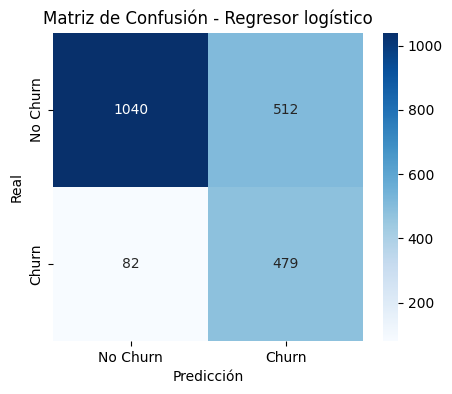

In [52]:
# Evaluación regresión logística
y_pred_lr = model_lr.predict(X_test)

# Exactitud
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Precisión
precision_lr = precision_score(y_test, y_pred_lr)

# Recall (Sensibilidad)
recall_lr = recall_score(y_test, y_pred_lr)

# F1-score
f1_lr = f1_score(y_test, y_pred_lr)

# Matriz de confusión
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Imprimir resultados
print("\n<-------------------- Evaluación -------------------->")
print(f"Exactitud: {accuracy_lr:.4f}")
print(f"Precisión: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-score: {f1_lr:.4f}")
print("<---------------------------------------------------->")

# Reporte completo
print("\n<------------- Reporte de Clasificación ------------->")
print(classification_report(y_test, y_pred_lr, target_names=["No Churn", "Churn"]), end="")
print("<---------------------------------------------------->")
print()

# Pintar la matriz de confusión
plt.figure(figsize=(5, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Regresor logístico')
plt.show()


<-------------------- Evaluación -------------------->
Exactitud: 0.7288
Precisión: 0.4937
Recall: 0.8414
F1-score: 0.6223
<---------------------------------------------------->

<------------- Reporte de Clasificación ------------->
              precision    recall  f1-score   support

    No Churn       0.92      0.69      0.79      1552
       Churn       0.49      0.84      0.62       561

    accuracy                           0.73      2113
   macro avg       0.71      0.76      0.71      2113
weighted avg       0.81      0.73      0.74      2113
<---------------------------------------------------->



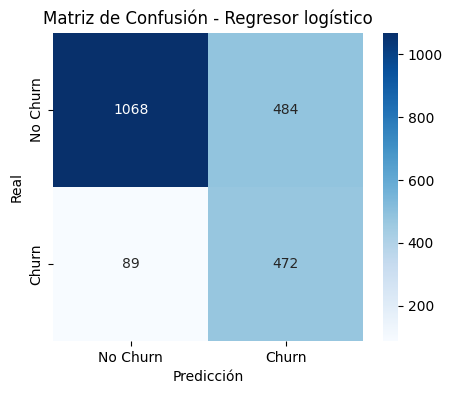

In [53]:
# Evaluación regresión logística optimizada
y_pred_lr_opt = model_lr_opt.predict(X_test)

# Exactitud
accuracy_lr_opt = accuracy_score(y_test, y_pred_lr_opt)

# Precisión
precision_lr_opt = precision_score(y_test, y_pred_lr_opt)

# Recall (Sensibilidad)
recall_lr_opt = recall_score(y_test, y_pred_lr_opt)

# F1-score
f1_lr_opt = f1_score(y_test, y_pred_lr_opt)

# Matriz de confusión
cm_lr_opt = confusion_matrix(y_test, y_pred_lr_opt)

# Imprimir resultados
print("\n<-------------------- Evaluación -------------------->")
print(f"Exactitud: {accuracy_lr_opt:.4f}")
print(f"Precisión: {precision_lr_opt:.4f}")
print(f"Recall: {recall_lr_opt:.4f}")
print(f"F1-score: {f1_lr_opt:.4f}")
print("<---------------------------------------------------->")

# Reporte completo
print("\n<------------- Reporte de Clasificación ------------->")
print(classification_report(y_test, y_pred_lr_opt, target_names=["No Churn", "Churn"]), end="")
print("<---------------------------------------------------->")
print()

# Pintar la matriz de confusión
plt.figure(figsize=(5, 4))
sns.heatmap(cm_lr_opt, annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Regresor logístico')
plt.show()

### Modelo con mejor desempeño

In [54]:
# Comparando los modelos
model_comparison = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Optimized Random Forest', 'KNN', 'Logistic Regression', 'Optimized Logistic Regression'],
    'Accuracy': [accuracy_tree, accuracy_rf, accuracy_rf_opt, accuracy_knn, accuracy_lr, accuracy_lr_opt],
    'Precision': [precision_tree, precision_rf, precision_rf_opt, precision_knn, precision_lr, precision_lr_opt],
    'Recall': [recall_tree, recall_rf, recall_rf_opt, recall_knn, recall_lr, recall_lr_opt],
    'F1-score': [f1_tree, f1_rf, f1_rf_opt, f1_knn, f1_lr, f1_lr_opt]
})

# Pintar la tabla ordenando de mayor a menor por la métrica F1
model_comparison = model_comparison.round(4).sort_values(by='F1-score', ascending=False)
display(model_comparison)

,Model,Accuracy,Precision,Recall,F1-score
5,Optimized Logistic Regression,0.7288,0.4937,0.8414,0.6223
4,Logistic Regression,0.7189,0.4834,0.8538,0.6173
2,Optimized Random Forest,0.7217,0.4860,0.8342,0.6142
1,Random Forest,0.7018,0.4675,0.8841,0.6116
0,Decision Tree,0.6990,0.4614,0.7986,0.5849
3,KNN,0.6711,0.4389,0.8574,0.5806


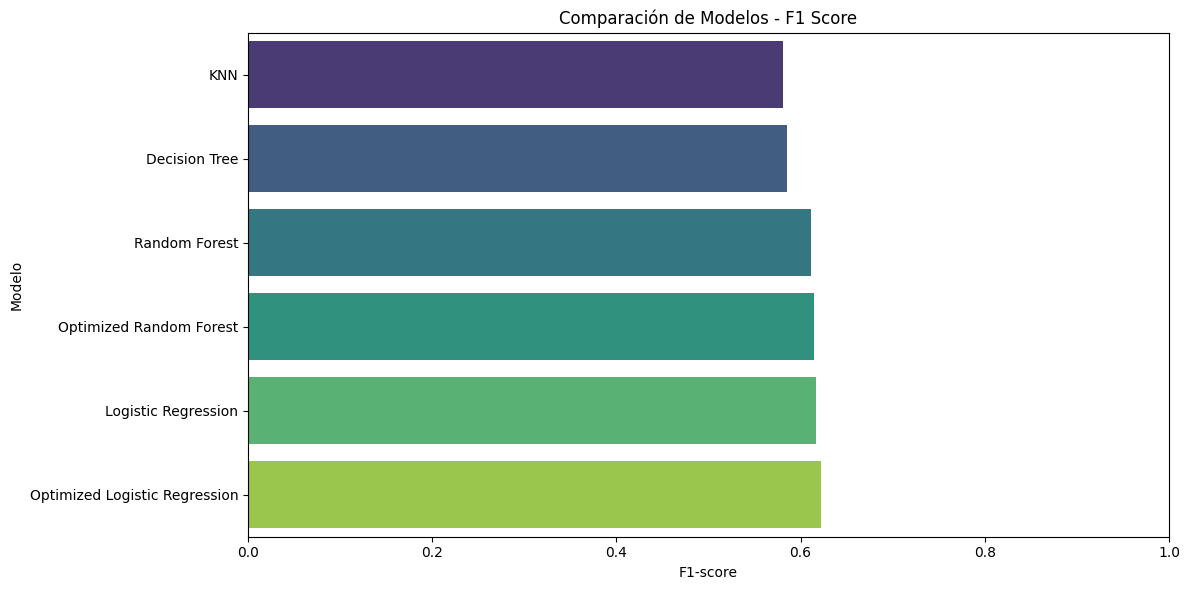

In [55]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x='F1-score',
    y='Model',
    data=model_comparison.sort_values('F1-score', ascending=True),
    hue='Model',
    palette='viridis',
    legend=False
)

plt.title('Comparación de Modelos - F1 Score')
plt.xlabel('F1-score')
plt.ylabel('Modelo')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

# 📋 Interpretación y Conclusiones

## Análisis de la Importancia de las Variables

Para comprender qué variables influyen más en la predicción de cancelación de clientes (churn), se realizó un análisis comparativo de la importancia de características a través de los dos modelos principales entrenados: Regresión Logística y Random Forest.

El objetivo fue identificar de forma consistente cuáles atributos del cliente y del servicio contribuyen más al abandono, y si estas contribuciones son coincidentes entre modelos con enfoques distintos.

#### Random Forest — Importancia de Características

Random Forest es un conjunto de árboles de decisión que evalúan variables en múltiples niveles de decisión. Para este modelo se utilizó:

El atributo .feature_importances_, que mide cuánto reduce la impureza (Gini) cada variable en promedio a lo largo de los árboles.

Se construyó una serie ordenada con las variables más importantes.

💡 Valores más altos indican variables que el modelo usó más para dividir los nodos de decisión.

Este enfoque captura relaciones no lineales y complejas, por lo que es útil como contraste con el modelo lineal.

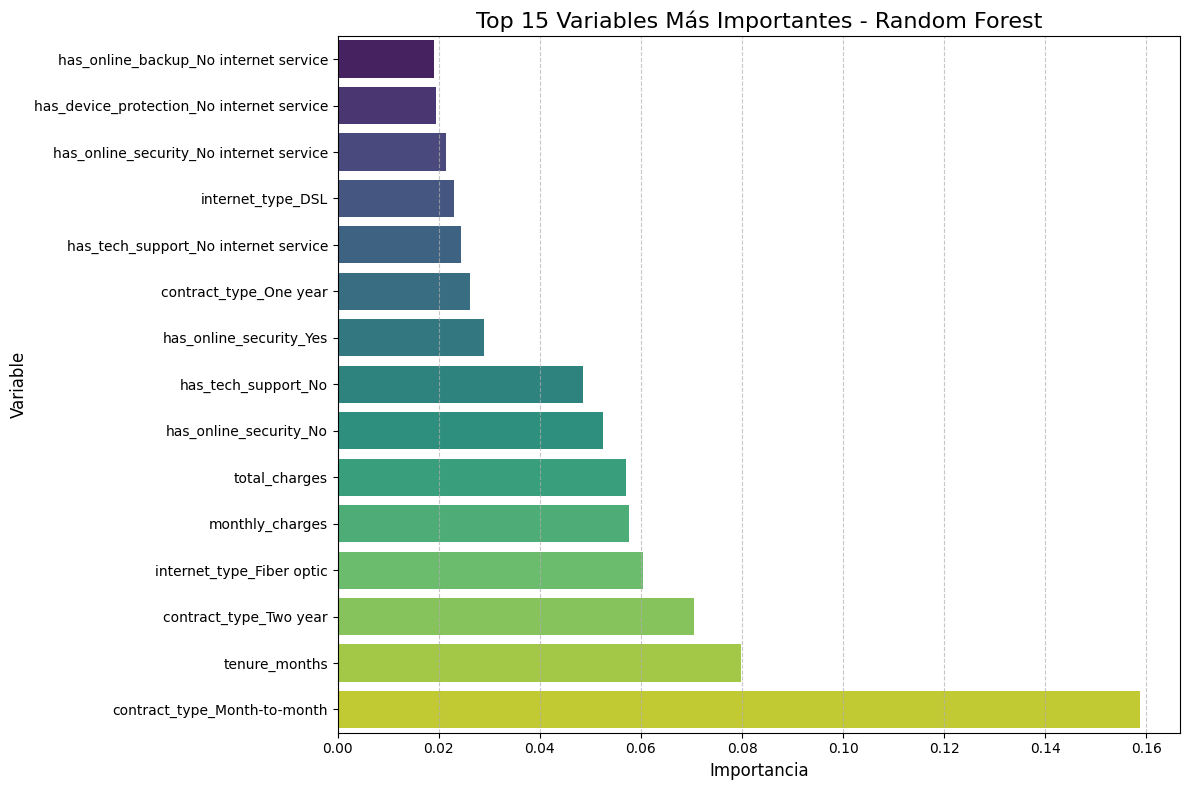

In [56]:
# Importancia de las variables - Random Forest

# Obtener las importancias de cada variable del modelo de Random Forest entrenado
importances_rf = pd.Series(model_rf_opt.feature_importances_, index=X_train.columns)
# Seleccionar las 15 variables con mayor importancia
# .sort_values(ascending=True).tail(15): ordenar de menor a mayor y tomar las 15 últimas variables (más importantes)
top_rf = importances_rf.sort_values(ascending=True).tail(15)

# Convertir las importancias a un DataFrame
top_rf_df = top_rf.reset_index() # Convertir el índice (nombres de variables) en una columna
top_rf_df.columns = ['Caracteristica', 'Importancia'] # Renombra las columnas para claridad

# Visualización
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_rf_df,
    x='Importancia',
    y='Caracteristica',
    hue='Caracteristica',
    palette='viridis',
    dodge=False,
    legend=False
)

plt.title("Top 15 Variables Más Importantes - Random Forest", fontsize=16)
plt.xlabel("Importancia", fontsize=12)
plt.ylabel("Variable", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [57]:
print("\nTop 15 Variables Más Importantes según Random Forest:\n")
print(top_rf_df.to_string(index=False))


Top 15 Variables Más Importantes según Random Forest:

                           Caracteristica  Importancia
    has_online_backup_No internet service     0.019132
has_device_protection_No internet service     0.019548
  has_online_security_No internet service     0.021506
                        internet_type_DSL     0.023064
     has_tech_support_No internet service     0.024337
                   contract_type_One year     0.026260
                  has_online_security_Yes     0.028970
                      has_tech_support_No     0.048616
                   has_online_security_No     0.052545
                            total_charges     0.057116
                          monthly_charges     0.057645
                internet_type_Fiber optic     0.060317
                   contract_type_Two year     0.070515
                            tenure_months     0.079803
             contract_type_Month-to-month     0.158707


#### Regresión Logística — Coeficientes

La regresión logística es un modelo lineal, por lo que cada variable tiene un coeficiente que representa su influencia directa sobre la probabilidad de cancelación:

Se extrajeron los coeficientes del modelo optimizado y se tomó su valor absoluto para evaluar la magnitud de la influencia.

💡 Coeficientes positivos implican que la variable aumenta la probabilidad de churn.

💡 Coeficientes negativos indican que la variable reduce la probabilidad de churn.

Este análisis permite una interpretación transparente del efecto de cada variable.

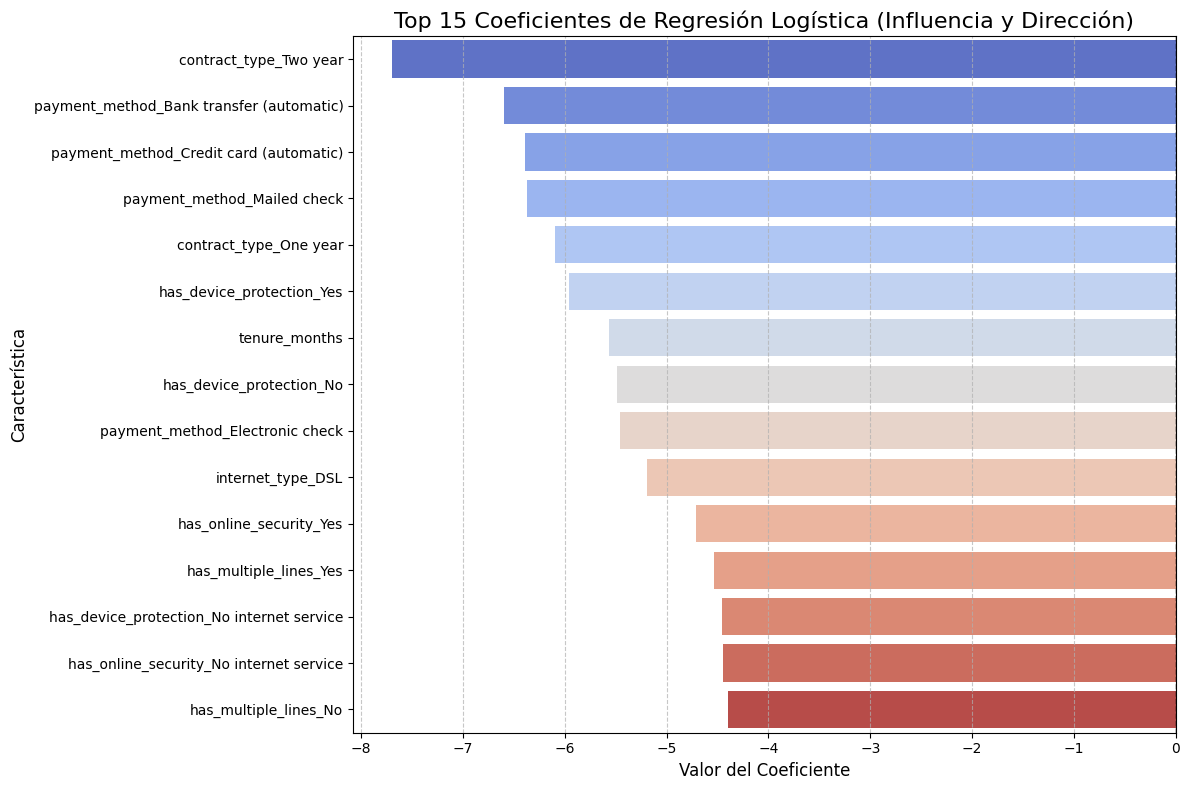

In [58]:
# Coeficientes de las variables - Regresión Logística

# Crear DataFrame con coeficientes y magnitud absoluta
coeficientes_df = pd.DataFrame({
    'Caracteristica': X_train.columns,
    'Coeficiente': model_lr_opt.coef_[0]
})
coeficientes_df['Abs_Coef'] = coeficientes_df['Coeficiente'].abs()

# Seleccionar los 15 más influyentes (por magnitud)
top15 = coeficientes_df.sort_values(by='Abs_Coef', ascending=False).head(15)
top15 = top15.sort_values(by='Coeficiente')  # Para orden visual

# Gráfico
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top15,
    x='Coeficiente',
    y='Caracteristica',
    hue='Caracteristica',
    palette='coolwarm',
    dodge=False,
    legend=False
)

plt.title('Top 15 Coeficientes de Regresión Logística (Influencia y Dirección)', fontsize=16)
plt.xlabel('Valor del Coeficiente', fontsize=12)
plt.ylabel('Característica', fontsize=12)
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [59]:
print("Top 15 Coeficientes de la Regresión Logística (por magnitud):\n")
print(top15[['Caracteristica', 'Coeficiente']].to_string(index=False))

Top 15 Coeficientes de la Regresión Logística (por magnitud):

                           Caracteristica  Coeficiente
                   contract_type_Two year    -7.694552
 payment_method_Bank transfer (automatic)    -6.594102
   payment_method_Credit card (automatic)    -6.395513
              payment_method_Mailed check    -6.369276
                   contract_type_One year    -6.100702
                has_device_protection_Yes    -5.962032
                            tenure_months    -5.563520
                 has_device_protection_No    -5.490431
          payment_method_Electronic check    -5.458225
                        internet_type_DSL    -5.197303
                  has_online_security_Yes    -4.716313
                   has_multiple_lines_Yes    -4.536022
has_device_protection_No internet service    -4.459187
  has_online_security_No internet service    -4.449108
                    has_multiple_lines_No    -4.396273


## 🔎 Informe detallado

### 📊 Rendimiento de Modelos

El modelo **Optimized Logistic Regression** obtuvo el **mejor desempeño** con un **F1-score de 0.6223,** destacándose por su **equilibrio** entre **precisión (0.4937) y recall (0.8414).** Otros modelos como **Logistic Regression (0.6173)** y **Optimized Random Forest (0.6142)** también mostraron buenos resultados, mientras que **KNN** tuvo el **menor rendimiento (0.5806).**

### 🔔 Factores Más Influyentes en la Cancelación


#### Según Random Forest (Importancia de Variables)

- **contract_type_Month-to-month (0.158707):** Los **contratos mes a mes** son el **factor más influyente, aumentando significativamente el riesgo de churn.**

- **tenure_months (0.079803):** **Mayor antigüedad reduce el churn,** actuando como un **factor protector** clave.

- **contract_type_Two year (0.070515):** Los **contratos de dos años disminuyen el riesgo de cancelación.**

- **internet_type_Fiber optic (0.060317):** El **servicio de fibra óptica** está **asociado con mayor churn,** posiblemente por problemas de calidad o expectativas no cumplidas.

- **monthly_charges (0.057645) y total_charges (0.057116):** **Cargos elevados incrementan el churn,** sugiriendo **insatisfacción con el valor percibido.**

- **has_online_security_No (0.052545) y has_tech_support_No (0.048616):** La ausencia de seguridad online y soporte técnico aumenta el riesgo.

- **has_online_security_Yes (0.028970):** La presencia de seguridad online reduce el churn.

#### Según Regresión Logística (Coeficientes)

- **contract_type_Two year (-7.694552):** El factor más protector, reduciendo drásticamente el churn.

- **payment_method_Bank transfer (automatic) (-6.594102) y Credit card (automatic) (-6.395513):** **Métodos de pago automáticos están asociados con menor churn.**

- **contract_type_One year (-6.100702):** Similar a los contratos de dos años, reduce el churn.

- **tenure_months (-5.563520):** Confirma que **mayor antigüedad disminuye el riesgo de cancelación.**

- **has_device_protection_Yes (-5.962032) y has_online_security_Yes (-4.716313):** Servicios de valor agregado como protección de dispositivos y seguridad online son factores protectores.

- **payment_method_Electronic check (-5.458225):** Menos protector que otros métodos, sugiriendo posibles problemas de facturación.

### ⚠️ Principales Factores de Riesgo

- **Contratos mes a mes:** Alta flexibilidad asociada con mayor churn.

- **Servicio de fibra óptica:** Posibles problemas de calidad o valor percibido.

- **Altos cargos mensuales/totales:** Insatisfacción con costos.

- **Falta de servicios de valor agregado:** Ausencia de seguridad online o soporte técnico incrementa el riesgo.

### 💡 Factores Protectores

- **Contratos a largo plazo (1 o 2 años):** Compromiso reduce el churn.

- **Mayor antigüedad:** Clientes leales son menos propensos a cancelar.

- **Métodos de pago automáticos:** Facilitan la retención.

- **Servicios de valor agregado:** Seguridad y protección de dispositivos fortalecen la lealtad.

### 🪝 Estrategias de Retención

**1. Incentivar Contratos a Largo Plazo**

- Ofrecer descuentos o beneficios (e.g., meses gratis) para migrar de contratos mes a mes a planes de 1 o 2 años.

**2. Foco en Retención Temprana**

- Implementar programas de bienvenida con seguimiento intensivo en los primeros 3-6 meses, incluyendo soporte proactivo y encuestas de satisfacción.

**3. Optimizar el Servicio de Fibra Óptica**

- Investigar y mejorar calidad, velocidad y soporte técnico; ajustar precios o comunicar mejor el valor del servicio.

**4. Revisar Estrategia de Precios**

- Evaluar la percepción de valor en clientes con altos cargos; ofrecer planes personalizados o servicios adicionales gratuitos.

**5. Promover Servicios de Valor Agregado**

- Incentivar la adopción de seguridad online y protección de dispositivos con promociones o paquetes combinados.

**6. Fomentar Métodos de Pago Automáticos**

- Ofrecer descuentos por usar transferencia bancaria o tarjeta de crédito automática; resolver problemas con "electronic check".

**7. Sistema de Alertas Proactivas**

- Implementar el modelo Optimized Logistic Regression para identificar clientes en riesgo y ejecutar intervenciones personalizadas (e.g., ofertas, contacto directo).

## 📢 Conclusión

El análisis identifica los **contratos mes a mes, el servicio de fibra óptica, los altos cargos y la falta de servicios de valor agregado** como los **principales impulsores del churn,** mientras que los **contratos a largo plazo, la antigüedad, los métodos de pago automáticos y los servicios adicionales actúan como protectores.** Las estrategias propuestas abordan estos factores clave, combinando incentivos, mejoras operativas y tecnología predictiva para reducir la cancelación y aumentar la retención de clientes de manera efectiva.